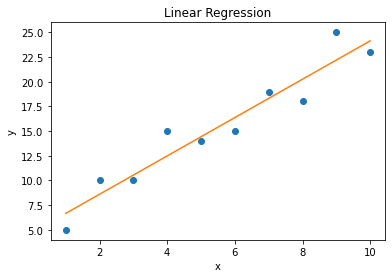

m = [1.93939394] 
b = [4.73333333]


In [1]:
# Fitting Linear Regression line to a set of X, Y data points

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',')

X = df.values[:,:-1]
Y = df.values[:, -1]

fit = LinearRegression().fit(X, Y)

m = fit.coef_.flatten() #gradient of fitted line
b = fit.intercept_.flatten() #y-intercept of fitted line

plt.plot(X, Y, 'o')
plt.plot(X, m*X + b)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

print('m = {0} \nb = {1}'.format(m, b))

In [2]:
# Finding the residuals/errors for the fitted line & data points

import pandas as pd

points = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',').itertuples() #import points

m = 1.9394
b = 4.7333

sum_of_squares = 0  #declare sum of squares value before looping

for p in points:
    y_actual = p.y
    y_predicted = m*p.x + b
    residual = y_actual - y_predicted
    residual_squared = (y_actual - y_predicted)**2
    print('Residual error {0}: {1}'.format(p, residual))
    # Finding the sum of squares for the residuals/error values above
    sum_of_squares += residual_squared
    
print('Sum of squared of residuals = {0}'.format(sum_of_squares))

Residual error Pandas(Index=0, x=1, y=5): -1.6726999999999999
Residual error Pandas(Index=1, x=2, y=10): 1.3879000000000001
Residual error Pandas(Index=2, x=3, y=10): -0.5515000000000008
Residual error Pandas(Index=3, x=4, y=15): 2.5091
Residual error Pandas(Index=4, x=5, y=14): -0.430299999999999
Residual error Pandas(Index=5, x=6, y=15): -1.3697000000000017
Residual error Pandas(Index=6, x=7, y=19): 0.6908999999999992
Residual error Pandas(Index=7, x=8, y=18): -2.2485
Residual error Pandas(Index=8, x=9, y=25): 2.812100000000001
Residual error Pandas(Index=9, x=10, y=23): -1.1272999999999982
Sum of squared of residuals = 28.096969700000006


In [3]:
# Finding the best fit line by finding the best m and b values producing the minimum sum of squares.
# The lower the Sum of Squares of residuals -> the better the fit -> essentially Minimising the Loss function.
# Several Optimization techniques: 
    # 1) Closed Form Equation; 
    # 2) Matrix Inversion;
    # 3) Matrix Decomposition; 
    # 4) Gradient Descent; 
    # 5) Stochastic Gradient Descent

In [4]:
# 1) Closed Form Equation
# Suitable for a Simple Linear regression with one input and one output variable
# Tend not to scale well, especially with larger datasets
# Equation for m & b derived from Calculus

import pandas as pd

points = list(pd.read_csv('https://bit.ly/3goOAnt', delimiter=',').itertuples()) #import points

n = len(points)
print('Total no. of items: {0}'.format(n))

m = ((n * sum(p.x * p.y for p in points) - ((sum(p.x for p in points) * sum(p.y for p in points))))) / ((n * sum(p.x ** 2 for p in points)) - (sum(p.x for p in points)**2))
    
b = (sum(p.y for p in points) / n) - m*(sum(p.x for p in points) / n)

print('m = {0} \nb = {1}'.format(m ,b))

Total no. of items: 10
m = 1.9393939393939394 
b = 4.7333333333333325


In [5]:
# 2) Matrix Inversion

import pandas as pd
import numpy as np
from numpy.linalg import inv

df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',')

X = df.values[:, :-1].flatten()
Y = df.values[:, -1]

# Adding placeholder 1s column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).transpose()

b = inv(X_1.transpose() @ X_1) @ (X_1.transpose() @ Y)

print('Matrix Inversion technique yields \n[m  b] : {0}'.format(b))

Matrix Inversion technique yields 
[m  b] : [1.93939394 4.73333333]


In [6]:
# 3) Matrix Decomposition (QR Decomposition)
# QR Decomposition copes with large amounts of data well and exhibits Numerical stability in minimising errors in approximations

import pandas as pd
import numpy as np
from numpy.linalg import inv, qr

df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',')

X = df.values[:, :-1].flatten()
Y = df.values[:, -1]

# Adding placeholder 1s column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).transpose()

# Calcuulate coefficients of Slope m and Intercept b using QR decomposition
Q, R = qr(X_1)
b = inv(R) @ (Q.transpose() @ Y)

print('Matrix QR Decomposition technique yields \n[m  b] : {0}'.format(b))

Matrix QR Decomposition technique yields 
[m  b] : [1.93939394 4.73333333]


Derivative of function (x - 3)**2 + 4 is 2*x - 6
Value of x with minimal gradient after 100000 iterations: 3.0 
Value of f(x) at x value above: 4.0
Value of gradient at x value above: 0.0


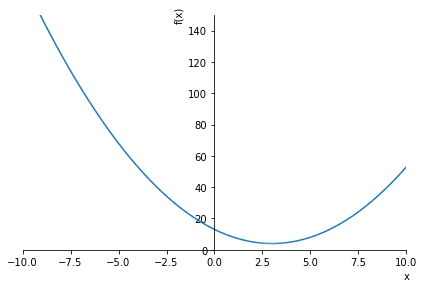

In [7]:
# 4) Gradient Descent part 1

# Testing the concept of Gradient Descent by finding value of x with gradient very close to zero for f(x)=(x-3)**2 + 4

import random
from sympy import *

x = symbols('x')
function = (x-3)**2 + 4
deriv_func = diff(function)
print('Derivative of function {0} is {1}'.format(function, deriv_func))

def f(x): 
    return (x-3)**2 + 4

def dx_f(x):
    return 2*x - 6

# set Learning rate value, a learning rate of 0.01 with 100,000 iterations is slightly better than 0.001 with 100,000 iterations
L = 0.01

# set no. of iterations to perform
Iterations = 100000

# start at a random x value
x = random.randint(-15,20)

for i in range(Iterations):
    slope = dx_f(x)
    x = x - (L*slope)
    
print('Value of x with minimal gradient after {0} iterations: {1} \nValue of f(x) at x value above: {2}'.format(Iterations, x, f(x)))
print('Value of gradient at x value above: {0}'.format(slope))

# plot the function to see whether above is true
plot(function, xlim=(-10, 10), ylim=(0,150))

Final result of optimized Linear Regression model function : 
f(x) = 1.9393939393939548x + 4.733333333333227


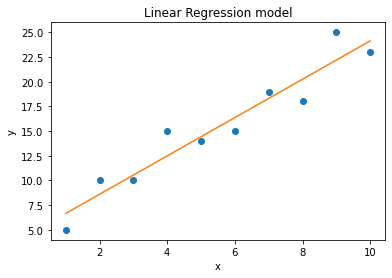

In [8]:
# 4) Gradient Descent part 2

# Gradient Descent for a Linear Regression using 'https://bit.ly/3goOAnt' dataset using Nympy library

import pandas as pd
import matplotlib.pyplot as plt

points = list(pd.read_csv('https://bit.ly/3goOAnt', delimiter=',').itertuples())
n = float(len(points)) #no. of elements in X

# setting the initial conditions & datatype
m = 0.0
b = 0.0

L = 0.001
iterations = 100000

# the gradient descent formula

for i in range(iterations):
    dm_f = sum(2 * p.x * ((m * p.x + b) - p.y) for p in points)
    db_f = sum(2 * ((m * p.x + b) - p.y) for p in points)
    m = m - L*dm_f
    b = b - L*db_f
    
print('Final result of optimized Linear Regression model function : \nf(x) = {0}x + {1}'.format(m, b))

df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',')
X = df.values[:, :-1]
Y = df.values[:, -1]

plt.plot(X, Y, 'o')
plt.plot(X, m*X + b)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression model')
plt.show()

Derivative wrt m: Sum(2*(b + m*x(i) - y(i))*x(i), (i, 0, n))
Derivative wrt b: Sum(2*b + 2*m*x(i) - 2*y(i), (i, 0, n))
Final equation obtained: y = 1.939393939393954x + 4.733333333333231


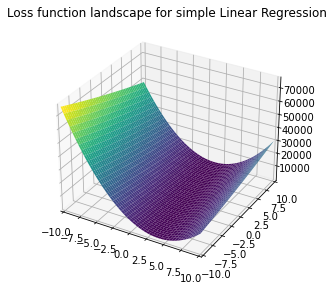

In [9]:
# 4) Gradient Descent part 3

# Gradient Descent for a Linear Regression using 'https://bit.ly/3goOAnt' dataset using Sympy library
# Batch Gradient Descent is used here where all the training data is used one-shot for all iterations. 

from sympy import *
from sympy.plotting import plot3d
import pandas as pd

# Getting the derivatives wrt m, b
m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls = Function)

sum_of_squares = Sum((m*x(i) + b - y(i))**2, (i,0,n))

deriv_wrt_m = diff(sum_of_squares, m)
deriv_wrt_b = diff(sum_of_squares, b)

print('Derivative wrt m: {0}'.format(deriv_wrt_m))
print('Derivative wrt b: {0}'.format(deriv_wrt_b))

# Solving Linear Regression
points = list(pd.read_csv('https://bit.ly/3goOAnt', delimiter=',').itertuples())

d_wrt_m = deriv_wrt_m \
            .subs(n, len(points) - 1).doit() \
            .replace(x, lambda i: points[i].x) \
            .replace(y, lambda i: points[i].y)

d_wrt_b = deriv_wrt_b \
            .subs(n, len(points) - 1).doit() \
            .replace(x, lambda i: points[i].x) \
            .replace(y, lambda i: points[i].y)

# compute using lambdify fucntion in Sympy library
d_wrt_m = lambdify([m, b], d_wrt_m)
d_wrt_b = lambdify([m, b], d_wrt_b)

m = 0.0
b = 0.0
L = 0.001
iterations = 100000

for i in range(iterations):
    m = m - L*d_wrt_m(m,b)
    b = b - L*d_wrt_b(m,b)
    
print('Final equation obtained: y = {0}x + {1}'.format(m, b))

# plotting the loss function in m, b, f(m,b) axes
points = list(pd.read_csv('https://bit.ly/3goOAnt', delimiter=',').itertuples())

m, b, i = symbols('m b i')
x, y = symbols('x y', cls = Function)

sum_of_squares = Sum((m*x(i) + b - y(i))**2, (i,0,n)) \
            .subs(n, len(points) - 1).doit() \
            .replace(x, lambda i: points[i].x) \
            .replace(y, lambda i: points[i].y)

plot3d(sum_of_squares, title='Loss function landscape for simple Linear Regression')


In [10]:
# 5) Stochastic Gradient Descent

# Stochastic Gradient Descent is used here where mini multiple batches of random samples are used in each iteration from the population. 

import pandas as pd
import numpy as np

data = pd.read_csv('https://bit.ly/2KF29Bd', header=0)

X = data.iloc[:, 0].values
Y = data.iloc[:, 1].values

n = data.shape[0] #how many data points/rows in the dataset

print('Dataset: \n{0}'.format(data))
print('List of X:\n{0}'.format(X))
print('List of Y:\n{0}'.format(Y))
print('Total no. of data points in the dataset: {0}'.format(n))

# Generating the model & setting the initial parameters
m = 0.0
b = 0.0
sample_size = 2
L = 0.0001
epochs = 1000000 #the no. of iterations to perform gradient descent

# Performing the Stochastic Gradient Descent
for i in range(epochs):
    idx = np.random.choice(n, sample_size, replace=False)
    x_sample = X[idx]
    y_sample = Y[idx]
    
    Y_predicted = m * x_sample + b #current predicted value of Y
    
    Deriv_wrt_m = (-2 / sample_size) * sum(x_sample * (y_sample - Y_predicted)) #derivative of loss function wrt m
    Deriv_wrt_b = (-2 / sample_size) * sum(y_sample - Y_predicted) #derivative of loss function wrt b
    
    m = m - L*Deriv_wrt_m
    b = b - L*Deriv_wrt_b
    
    if i % 20000 == 0:
        print('Value of i: {0}, Value of m: {1}, Value of b: {2}'.format(i, m, b))
        
print('Final equation: f(x) = {0}x + {1}'.format(m, b))

Dataset: 
    x   y
0   1   5
1   2  10
2   3  10
3   4  15
4   5  14
5   6  15
6   7  19
7   8  18
8   9  25
9  10  23
List of X:
[ 1  2  3  4  5  6  7  8  9 10]
List of Y:
[ 5 10 10 15 14 15 19 18 25 23]
Total no. of data points in the dataset: 10
Value of i: 0, Value of m: 0.016, Value of b: 0.0029000000000000002
Value of i: 20000, Value of m: 2.187427983411217, Value of b: 2.856724683789949
Value of i: 40000, Value of m: 2.04966106662685, Value of b: 3.9273506009703603
Value of i: 60000, Value of m: 1.9879920112296035, Value of b: 4.398873455783394
Value of i: 80000, Value of m: 1.970617446304491, Value of b: 4.58351064643702
Value of i: 100000, Value of m: 1.9531720770510357, Value of b: 4.679169000450926
Value of i: 120000, Value of m: 1.9809728767739065, Value of b: 4.697968138957314
Value of i: 140000, Value of m: 1.952868419986233, Value of b: 4.706598137311189
Value of i: 160000, Value of m: 1.9495384663318862, Value of b: 4.719733659375376
Value of i: 180000, Value of m: 1.9

In [11]:
# Understanding the Correlation Coefficient_Pearson (r)

import pandas as pd

df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=',')

correlations = df.corr(method='pearson')

print(correlations)

          x         y
x  1.000000  0.957586
y  0.957586  1.000000


In [12]:
# The Correlation Coefficient (Pearson) function
import pandas as pd
from math import sqrt


def Correlation_coefficient_pearson(points):
    
    n = len(points)
    
    numerator = n * sum(p.x * p.y for p in points) - \
                sum(p.x for p in points) * sum(p.y for p in points)
    denominator = sqrt(n * sum(p.x**2 for p in points) - sum(p.x for p in points)**2) \
                  * sqrt(n * sum(p.y**2 for p in points) - sum(p.y for p in points)**2)
    
    corr = numerator / denominator
    
    return corr
    
df = list(pd.read_csv('https://bit.ly/2KF29Bd').itertuples())

pearson_corr = Correlation_coefficient_pearson(df)

print('The Pearson Correlation Coefficient is: {0}'.format(pearson_corr))

The Pearson Correlation Coefficient is: 0.9575860952087218


In [13]:
# Statistical Significance of the Linear Regression
import numpy as np
from scipy.stats import t
from math import sqrt

# sample definition
n = 10
lower_cv = t(n-1).ppf(0.025) # Test value of lower end of T-distribution at 2.5% confidence
upper_cv = t(n-1).ppf(0.975) # Test value of lower end of T-distribution at 2.5% confidence

# Correlation Coefficient
# use sample correlation coefficient from previous data 'https://bit.ly/2KF29Bd'
r = 0.9575860952087218

# Perform the T-test
test_value = r / sqrt((1-r**2) / (n-2))

print('TEST VALUE: {0}'.format(test_value))
print('CRITICAL RANGE: {0}, {1}'.format(lower_cv, upper_cv))

if test_value < lower_cv or test_value > upper_cv:
    print('Conclusion: CORRELATION PROVEN, Reject H0')
else:
    print('Conclusion: CORRELATION NOT PROVEN, Failed to reject H0')
    
# Calculate p-value
if test_value > 0:
    p_value = 1 - t(n-1).cdf(test_value)
else: 
    p_value = t(n-1).cdf(test_value)
    
# Using two-tailed test, so multiply by 2
p_value = p_value * 2

print('P-VALUE: {0}'.format(p_value))


TEST VALUE: 9.399575927136752
CRITICAL RANGE: -2.262157162740992, 2.2621571627409915
Conclusion: CORRELATION PROVEN, Reject H0
P-VALUE: 5.976327099421752e-06


In [14]:
# Understanding the Coefficient of Determination or R-square (r2)

import pandas as pd

df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=',')

coeff_determination = df.corr(method='pearson')**2

print(coeff_determination)

          x         y
x  1.000000  0.916971
y  0.916971  1.000000


In [15]:
# Understanding the Standard Error of the Estimate (SSE)

import pandas as pd
from math import sqrt

points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=',').itertuples())

n = len(points)

# regression line parameters obtained previously
m = 1.939
b = 4.733

# calculate the SSE
SSE = sqrt((sum((p.y - (m*p.x + b))**2 for p in points)) / (n-2))

print('SSE for the linear regression above is: {0}'.format(SSE))

SSE for the linear regression above is: 1.87406793500129


In [16]:
# Understanding Prediction Intervals using a dataset on vet visits for a dog and age of dogs,
# Here, we are interested in finding out prediction interval for a dog aged 8.5 years old

import pandas as pd
from math import sqrt
from scipy.stats import t # use T-distribution as our sample size is small

#Load the data
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=',').itertuples())

n = len(points) #count no. of rows

#Linear Regression line obtained from above codes
m = 1.939393939393954
b = 4.733333333333231

# calculate prediction interval for x = 8.5 given y=no. of vet visits & x=age of the dog
x_0 = 8.5
x_mean = sum(p.x for p in points) / n

t_value = t(n-2).ppf(0.975) #95% two-tailed confidence interval

standard_error = sqrt(sum((p.y - (m*p.x + b))**2 for p in points) / (n-2))

margin_of_error = t_value * standard_error * sqrt(1 + (1/n) + (n * (x_0 - x_mean)**2) / \
                                                 (n * sum(p.x ** 2 for p in points) - \
                                                     sum(p.x for p in points)**2))
predicted_y = m*x_0 + b

print('Prediction interval for no. of vet visits with 95% confidence for a dog aged 8.5 years old: \nBetween {0} and {1}'.format(predicted_y - margin_of_error, predicted_y + margin_of_error))

Prediction interval for no. of vet visits with 95% confidence for a dog aged 8.5 years old: 
Between 16.466205062048395 and 25.970158574315285


In [17]:
# Trying out Test/Train Splits for a Linear Regression

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#load the dataset
df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=',')
X = df.values[:, :-1]
Y = df.values[:, -1]

#separate training & testing data -> setting 1/3 to be left out of the dataset for Testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4) #using test_size=1/4 is better than using test_size=1/3

#setting up the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)

print('r^2 : %.3f' % result)


r^2 : 0.993


In [18]:
# Trying out Cross-Validation for a Linear Regression

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

#load the dataset
df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=',')
X = df.values[:, :-1]
Y = df.values[:, -1]

#performing a linear regression incorporating cross-validation
kfold = KFold(n_splits = 5, random_state = 10, shuffle = True)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)

print(results)
print('MSE : mean = %.3f (stdev - %.5f)' % (results.mean(), results.std()))


[0.99464084 0.99306054 0.99015878 0.99299581 0.99320423]
MSE : mean = 0.993 (stdev - 0.00146)


In [19]:
# Trying out Random-fold Validation for a Linear Regression

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit, cross_val_score

#load the dataset
df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=',')
X = df.values[:, :-1]
Y = df.values[:, -1]

#performing a linear regression incorporating cross-validation
kfold = ShuffleSplit(n_splits = 20, test_size = 1/4, random_state = 7)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)

print(results)
print('Mean = %.3f (stdev - %.5f)' % (results.mean(), results.std()))

[0.99234901 0.99226752 0.9940231  0.99349246 0.99265416 0.9923708
 0.99246642 0.99438614 0.99246506 0.99224505 0.99284641 0.99280663
 0.99379376 0.9936306  0.99252887 0.99397079 0.99404819 0.99206112
 0.99464599 0.99287629]
Mean = 0.993 (stdev - 0.00079)


In [20]:
# Multiple Linear Regression - using two input variables and one output variable

import pandas as pd
from sklearn.linear_model import LinearRegression

#load the data
df = pd.read_csv('https://bit.ly/2X1HWH7', delimiter=',')
X = df.values[:, :-1]
Y = df.values[:, -1]

#Training
fit = LinearRegression().fit(X, Y)

#print coefficients
print('Coefficients = {0}'.format(fit.coef_))
print('Intercept = {0}'.format(fit.intercept_))
print('z = {0} + {1}x + {2}y'.format(fit.intercept_, fit.coef_[0], fit.coef_[1]))

Coefficients = [2.00672647 3.00203798]
Intercept = 20.109432820035977
z = 20.109432820035977 + 2.0067264725128062x + 3.002037976646692y
